In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the file
df = pd.read_excel('Copper_Set.xlsx')

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [7]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [8]:
#convert the data type from object to numeric

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

# make additional feature from date's columns 

df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['delivery_time_taken']=(df['item_date']-df['delivery date']).abs().dt.days

In [9]:
df.dtypes

id                             object
item_date              datetime64[ns]
quantity tons                 float64
customer                      float64
country                       float64
status                         object
item type                      object
application                   float64
thickness                     float64
width                         float64
material_ref                   object
product_ref                     int64
delivery date          datetime64[ns]
selling_price                 float64
delivery_time_taken           float64
dtype: object

In [10]:
# droping the columns

df.drop(columns=['id','item_date','delivery date','material_ref'], inplace=True)
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00,1.0
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00,1.0
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00,1.0
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00,1.0


In [11]:
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan  if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan  if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181668.0,5.875066e+03,2.349107e+06,0.00001,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181665.0,1.918124e+03,3.318020e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
delivery_time_taken,181667.0,6.413128e+01,4.095861e+01,0.00000,2.900000e+01,6.100000e+01,9.700000e+01,6.890000e+02


In [12]:
df.isnull().sum()

quantity tons           5
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
product_ref             0
selling_price           8
delivery_time_taken     6
dtype: int64

In [13]:
df['quantity tons']=df['quantity tons'].fillna(df['quantity tons'].median())
df['customer']=df['customer'].fillna(df['customer'].median())
df['country']=df['country'].fillna(df['country'].median())
df['application']=df['application'].fillna(df['application'].median())
df['thickness']=df['thickness'].fillna(df['thickness'].median())
df['selling_price']=df["selling_price"].fillna(df['selling_price'].median())
df['delivery_time_taken'] = df['delivery_time_taken'].fillna(df['delivery_time_taken'].median())

df['status']=df['status'].fillna(df['status'].mode().iloc[0])

In [14]:
df.isnull().sum()

quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
delivery_time_taken    0
dtype: int64

In [15]:
df.dtypes

quantity tons          float64
customer               float64
country                float64
status                  object
item type               object
application            float64
thickness              float64
width                  float64
product_ref              int64
selling_price          float64
delivery_time_taken    float64
dtype: object

In [16]:
#copy the dataframe to another to check the skewness and outliers

df1=df.copy()
df1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,delivery_time_taken
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,91.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,0.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,90.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,90.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,31.0


Skewness and Outlier

In [17]:
from scipy.stats import skew

# Check skewness
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
skewness = df1[numeric_cols].apply(skew)
print("Skewness:\n", skewness)


Skewness:
 quantity tons          424.687310
customer                86.984590
country                  0.753829
application              0.724558
thickness              303.445066
width                    0.374594
product_ref              1.015207
selling_price          301.385600
delivery_time_taken      0.469730
dtype: float64


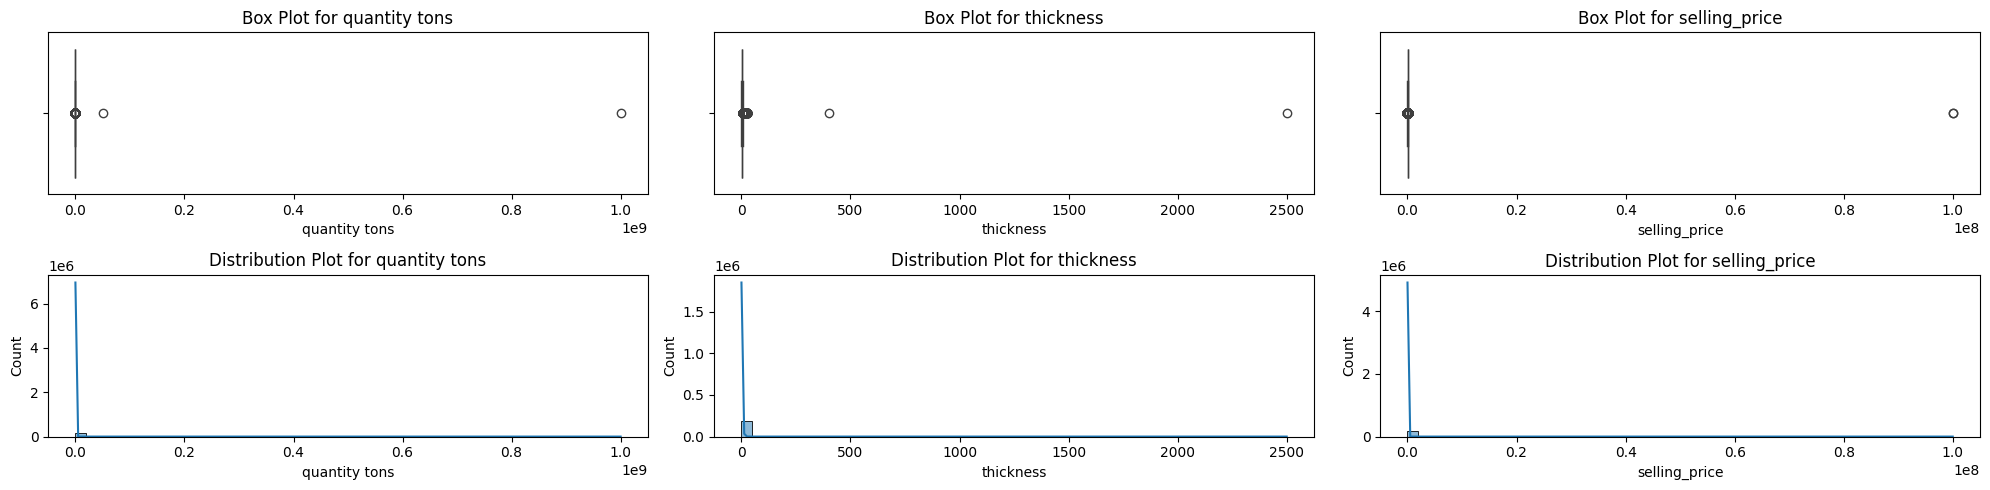

In [18]:
# highest Skewness  column 
#1. quantity tons
#2. thickness
#3. selling_price 

# List of columns to visualize
columns_visualize = ['quantity tons', 'thickness', 'selling_price']

# Visualization for boxplots and distribution plots
plt.figure(figsize=(20, 5))

# Loop through the list of columns
for i, column in enumerate(columns_visualize, 1):

     # Plot Distribution Plot (Histogram + KDE)
    plt.subplot(2, len(columns_visualize), len(columns_visualize) + i)  
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')
    
    # Plot Boxplot
    plt.subplot(2, len(columns_visualize), i)  # First row (Boxplots)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    
   

plt.tight_layout()
plt.show()


In [19]:
# Applying log transformation for skewed columns
df1["quantity tons_skew"] = np.log(df1["quantity tons"] + 1)  # Add 1 to avoid log(0) issues
df1["thickness_skew"] = np.log(df1["thickness"] + 1)  
df1["selling_price_skew"] = np.log(df1["selling_price"] + 1) 

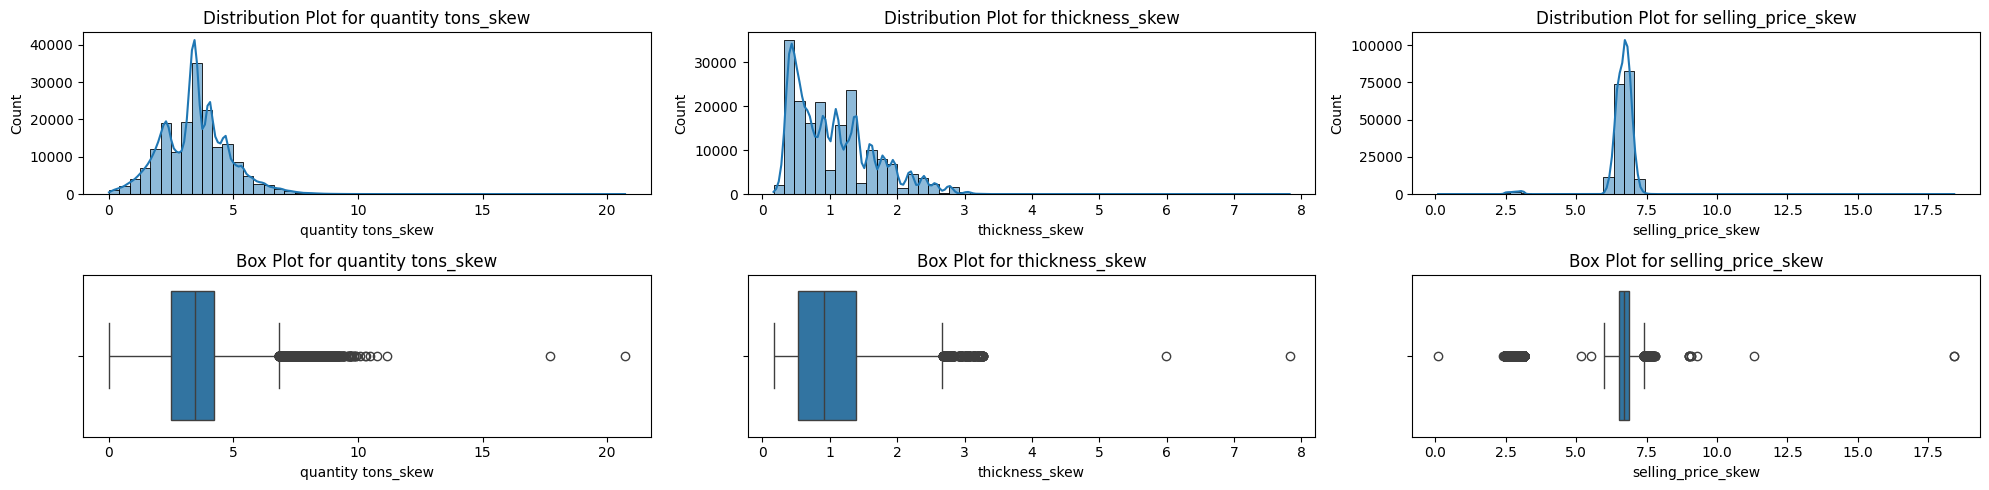

In [20]:
 # List of columns to visualize after log transformation
columns_skewed = ['quantity tons_skew', 'thickness_skew', 'selling_price_skew']

# Visualization for multiple columns
plt.figure(figsize=(20, 5))

# Loop through the list of columns and generate subplots
for i, column in enumerate(columns_skewed, 1):
    # Histogram
    plt.subplot(2, len(columns_skewed), i)  
    sns.histplot(data=df1, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')
  
    #boxplots 
    plt.subplot(2, len(columns_skewed), len(columns_skewed) + i)  
    sns.boxplot(data=df1, x=column)
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [21]:
df1.drop(columns=['quantity tons','thickness','selling_price'], inplace=True)
df1.head()

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_skew,thickness_skew,selling_price_skew
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,4.010077,1.098612,6.751101
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.645123,0.587787,6.954639
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.958755,0.322083,6.469762
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.315229,1.193922,6.645091
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,31.0,6.667626,1.609438,6.359574


In [22]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [ ]:
# handling the outliers 
outlier(df1,'quantity tons_skew')
outlier(df1,'thickness_skew')
outlier(df1,'selling_price_skew')

df1

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_skew,thickness_skew,selling_price_skew
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,91.0,4.010077,1.098612,6.751101
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,0.0,6.645123,0.587787,6.954639
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,90.0,5.958755,0.322083,6.469762
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,90.0,5.315229,1.193922,6.645091
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,31.0,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,1.0,4.639402,0.672944,6.383507
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,1.0,5.342748,0.667829,6.380123
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,1.655480,0.536493,6.429719
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.0,3.445693,0.615186,6.400257


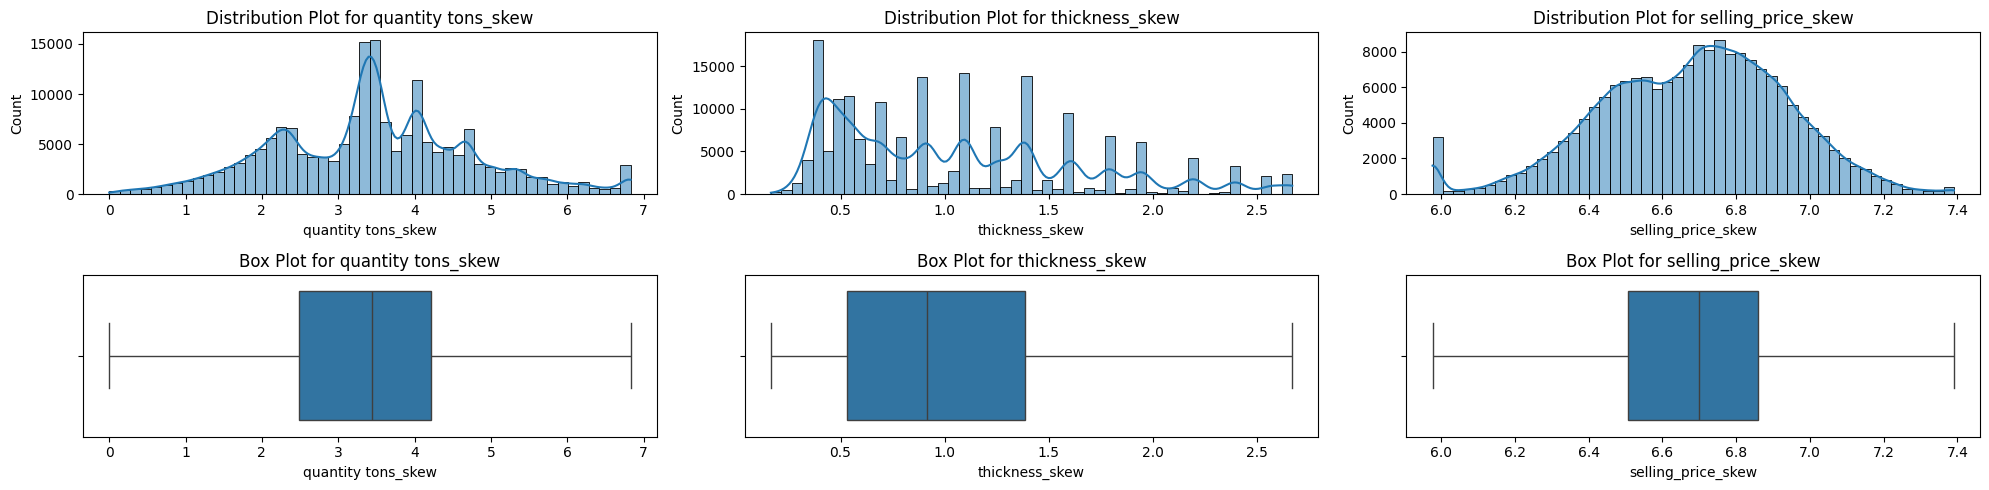

In [24]:
 # List of columns to visualize after log transformation
columns_skewed = ['quantity tons_skew', 'thickness_skew', 'selling_price_skew']

# Visualization for multiple columns
plt.figure(figsize=(20, 5))

# Loop through the list of columns and generate subplots
for i, column in enumerate(columns_skewed, 1):
    # Histogram
    plt.subplot(2, len(columns_skewed), i)  
    sns.histplot(data=df1, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')
  
    #boxplots 
    plt.subplot(2, len(columns_skewed), len(columns_skewed) + i)  
    sns.boxplot(data=df1, x=column)
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
# df1["status"]= df1["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
#                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df1['item type']=l.fit_transform(df1['item type'])
df1["status"]=l.fit_transform(df1['status'])
df1

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_skew,thickness_skew,selling_price_skew
0,30156308.0,28.0,7,5,10.0,1500.0,1670798778,91.0,4.010077,1.098612,6.751101
1,30202938.0,25.0,7,5,41.0,1210.0,1668701718,0.0,6.645123,0.587787,6.954639
2,30153963.0,30.0,7,6,28.0,952.0,628377,90.0,5.958755,0.322083,6.469762
3,30349574.0,32.0,7,3,59.0,1317.0,1668701718,90.0,5.315229,1.193922,6.645091
4,30211560.0,28.0,7,5,10.0,2000.0,640665,31.0,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,7,5,41.0,1220.0,164141591,1.0,4.639402,0.672944,6.383507
181669,30200854.0,25.0,7,5,41.0,1500.0,164141591,1.0,5.342748,0.667829,6.380123
181670,30200854.0,25.0,7,5,41.0,1250.0,164141591,1.0,1.655480,0.536493,6.429719
181671,30200854.0,25.0,7,5,41.0,1250.0,164141591,1.0,3.445693,0.615186,6.400257


In [26]:
df1["item type"].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [27]:
en_item_type = LabelEncoder()
df['item type'] = en_item_type.fit_transform(df['item type'])

# Initialize LabelEncoder for 'status'
en_status = LabelEncoder()
df["status"] = en_status.fit_transform(df['status'])

# 1. Retrieve Original Categories and Their Assigned Labels for 'item type'
print("Original Categories and Their Assigned Labels for 'item type':")
for original, label in zip(en_item_type.classes_, range(len(en_item_type.classes_))):
    print(f"{original}: {label}")

# 2. Retrieve Original Categories and Their Assigned Labels for 'status'
print("\nOriginal Categories and Their Assigned Labels for 'status':")
for original, label in zip(en_status.classes_, range(len(en_status.classes_))):
    print(f"{original}: {label}")

Original Categories and Their Assigned Labels for 'item type':
IPL: 0
Others: 1
PL: 2
S: 3
SLAWR: 4
W: 5
WI: 6

Original Categories and Their Assigned Labels for 'status':
Draft: 0
Lost: 1
Not lost for AM: 2
Offerable: 3
Offered: 4
Revised: 5
To be approved: 6
Won: 7
Wonderful: 8


<Axes: >

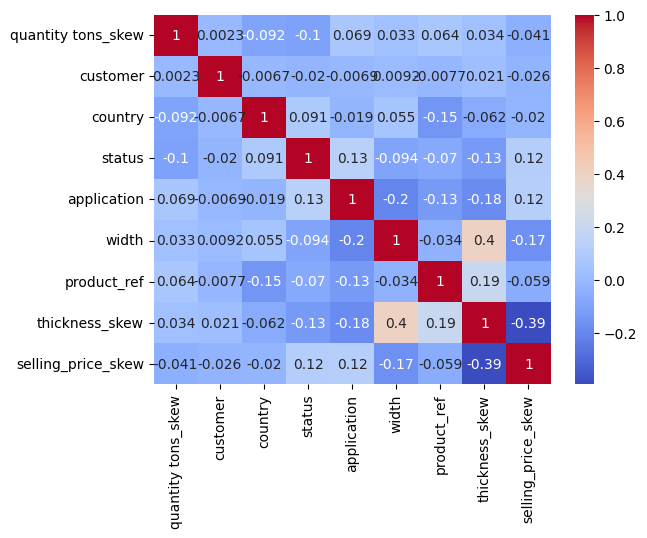

In [28]:
col= df1[["quantity tons_skew", "customer", "country", "status", "application", "width", "product_ref", "thickness_skew", "selling_price_skew"]].corr()
sns.heatmap(col, annot=True, cmap="coolwarm")

Regression Model

In [29]:
# importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model  import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import metrics
import numpy as np
import pickle

In [30]:
df2=df1.copy()

In [31]:
df2["status"].value_counts()

status
7    116012
1     34438
2     19573
5      4276
6      4170
0      3140
4        53
3        10
8         1
Name: count, dtype: int64

In [32]:
df2["item type"].value_counts()

item type
5    105615
3     69236
2      5660
1       610
6       524
0        27
4         1
Name: count, dtype: int64

In [33]:
def reg_algorithm(df,algorithms):
        x=df.drop(columns=['selling_price_skew'],axis=1)
        y=df['selling_price_skew']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for regression in algorithms:

                model=regression().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[regression.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results 

In [34]:
algorithms=[LinearRegression,DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor]

best_algorithm, results =reg_algorithm(df2, algorithms)

results_df = pd.DataFrame(results).transpose()
print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                      0.164604            0.045701                 0.213777  0.297616
DecisionTreeRegressor                 0.052745            0.009493                 0.097431  0.854102
ExtraTreesRegressor                   0.045299            0.005433                 0.073711  0.916494
RandomForestRegressor                 0.044785            0.005213                 0.072198  0.919887
GradientBoostingRegressor             0.115884            0.021006                 0.144934  0.677154
**Best Algorithm:** RandomForestRegressor


In [35]:
x=df2.drop(columns=['selling_price_skew'],axis=1)
y=df2['selling_price_skew']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = { 
    'n_estimators' :[100,150],
    'max_depth': [10,25],     
    'min_samples_split': [2,4], 
    'min_samples_leaf': [1,2],
    'max_features'    : ['sqrt', 'log2', None] }


grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                            param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 25,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 np.float64(0.9046207166190982))

In [36]:
x=df2.drop(columns=['selling_price_skew'],axis=1)
y=df2['selling_price_skew']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=150,max_features=None,max_depth=25,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.044815731058981255
Mean Squared Error: 0.005186949595396304
Root Mean Squared Error: 0.07202048038854159
R-squared: 0.9202802633741901


In [40]:
with open('Regression_model.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [41]:
#load the pickle and predict the selling price with regressor model

with open('Regression_model.pkl','rb') as files:
    predict_model=pickle.load(files)

pre=predict_model.predict(np.array([[30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147]]))
np.exp(pre[0])

d:\Industrial_Copper_Modeling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(781.7142377335218)

Classification Model

In [43]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, auc

In [45]:
df3 = df2[df2['status'].isin([7, 1])]
df3

,customer,country,status,item type,application,width,product_ref,delivery_time_taken,quantity tons_skew,thickness_skew,selling_price_skew
0,30156308.0,28.0,7,5,10.0,1500.0,1670798778,91.0,4.010077,1.098612,6.751101
1,30202938.0,25.0,7,5,41.0,1210.0,1668701718,0.0,6.645123,0.587787,6.954639
2,30153963.0,30.0,7,6,28.0,952.0,628377,90.0,5.958755,0.322083,6.469762
3,30349574.0,32.0,7,3,59.0,1317.0,1668701718,90.0,5.315229,1.193922,6.645091
4,30211560.0,28.0,7,5,10.0,2000.0,640665,31.0,6.667626,1.609438,6.359574
...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,7,5,41.0,1220.0,164141591,1.0,4.639402,0.672944,6.383507
181669,30200854.0,25.0,7,5,41.0,1500.0,164141591,1.0,5.342748,0.667829,6.380123
181670,30200854.0,25.0,7,5,41.0,1250.0,164141591,1.0,1.655480,0.536493,6.429719
181671,30200854.0,25.0,7,5,41.0,1250.0,164141591,1.0,3.445693,0.615186,6.400257


In [46]:
df3['status'].value_counts()

status
7    116012
1     34438
Name: count, dtype: int64

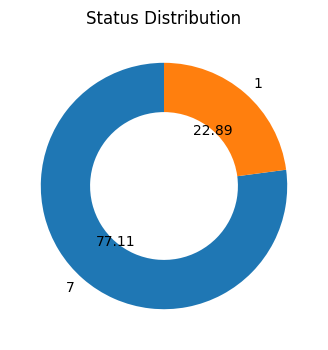

In [49]:
# Donut chart
status_counts = df3['status'].value_counts()
plt.figure(figsize=(7, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%.2f', startangle=90, wedgeprops={'width': 0.4})
plt.title("Status Distribution")
plt.show()


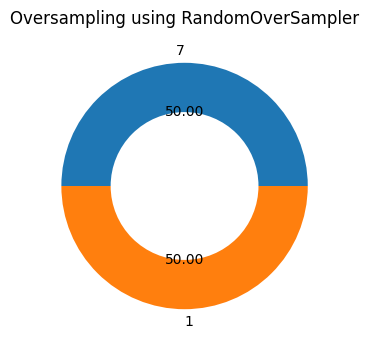

In [51]:
x=df3.drop('status',axis=1)
y=df3['status']

# oversampler
ros = RandomOverSampler()

# Apply oversampling
x_ros, y_ros = ros.fit_resample(x, y)

# Visualize the oversampled target distribution with a donut chart
fig, ax = plt.subplots(figsize=(7, 4))
y_ros.value_counts().plot.pie(autopct='%.2f', ax=ax, wedgeprops=dict(width=0.4))  
ax.set_title('Oversampling using RandomOverSampler')
ax.set_ylabel('') 
plt.show()

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [53]:
def classsification_algorithm(x_ros,y_ros,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=42)

        results={}

        for classification in algorithms:

                model=classification().fit(x_train,y_train)
                y_pred=model.predict(x_test)

                accuracy =metrics. accuracy_score(y_test, y_pred)
                precision =metrics. precision_score(y_test, y_pred)
                recall =metrics. recall_score(y_test, y_pred)
                f1 = metrics.f1_score(y_test, y_pred)

                results[classification.__name__] = {'Accuracy score': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['Accuracy score'])[0]  
        
        return best_algorithm, results  

In [54]:
algorithms = [ DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier,
            GradientBoostingClassifier]
best_algorithm, results = classsification_algorithm(x_ros,y_ros, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                            Accuracy score  Precision    Recall  F1-score
DecisionTreeClassifier            0.976612   0.964924  0.989458  0.977037
ExtraTreesClassifier              0.984714   0.976471  0.993543  0.984933
RandomForestClassifier            0.982789   0.971097  0.995400  0.983099
GradientBoostingClassifier        0.793673   0.777530  0.826043  0.801053
**Best Algorithm:** ExtraTreesClassifier


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=42)

param_grid = {
    "n_estimators":[50,100],
    'max_depth': [ 10,20],     
    'min_samples_split': [2,3,4],  
    'min_samples_leaf': [1, 2]     }


model = ExtraTreesClassifier(random_state=42) 

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring="accuracy",n_jobs=-1)

grid_search.fit(x_train, y_train)

grid_search.best_params_,grid_search.best_score_

({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 np.float64(0.9525231517102124))

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=42)

classifier_model = ExtraTreesClassifier(n_estimators=100,max_depth=20,min_samples_leaf=1,min_samples_split=2)
classifier_model.fit(x_train, y_train)

y_pred = classifier_model.predict(x_test)

# evaluation metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[34726   277]
 [ 2840 31765]]
              precision    recall  f1-score   support

           1       0.92      0.99      0.96     35003
           7       0.99      0.92      0.95     34605

    accuracy                           0.96     69608
   macro avg       0.96      0.96      0.96     69608
weighted avg       0.96      0.96      0.96     69608



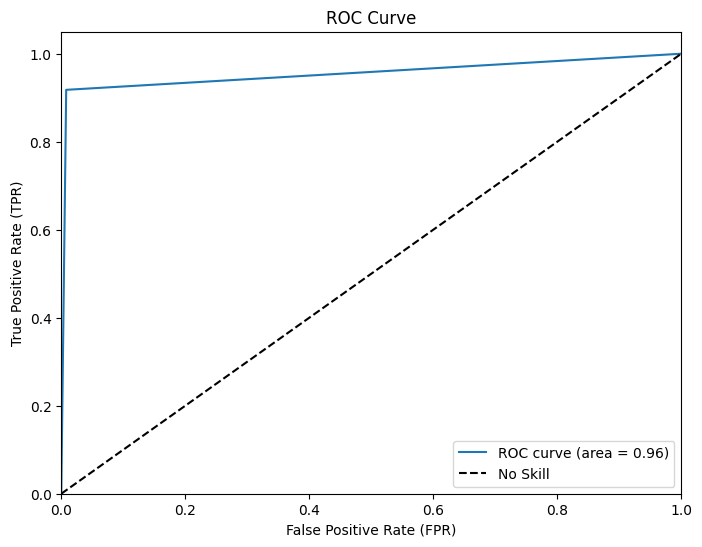

In [57]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred, pos_label=7)
auc_curve=auc(x=fpr,y=tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_curve)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show()

In [58]:
feature_scores = pd.Series(classifier_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

delivery_time_taken    0.172166
item type              0.141640
country                0.127393
application            0.122404
customer               0.119715
quantity tons_skew     0.084922
selling_price_skew     0.069641
product_ref            0.065359
thickness_skew         0.061009
width                  0.035751
dtype: float64

In [59]:
with open('Classifier_model.pkl','wb') as  files:
    pickle.dump(classifier_model,files)

In [60]:
with open('Classifier_model.pkl','rb') as files:
    classifier=pickle.load(files)

In [61]:
class_model= classifier.predict( np.array([[30156308.0,28.0,5.0,10.0,1500.0,1670798778,91.0,3.991779,0.693147,6.749931]]))
if class_model[0] == 7:
    print('Won')
else:
    print('Lose')

Won


d:\Industrial_Copper_Modeling\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
